## 2-1)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.1684123071910781
        x: [-2.767e-01  1.519e+00]
      nit: 12
      jac: [ 2.975e-06 -2.420e-06]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


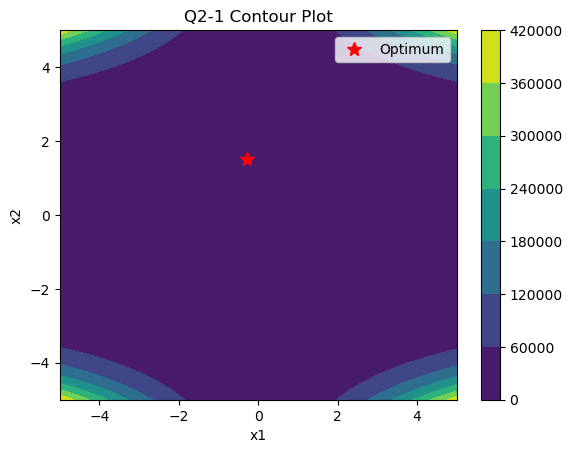

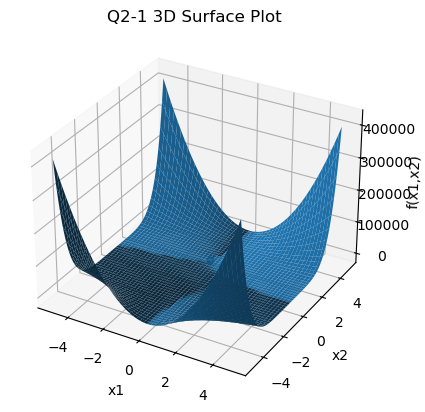

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Q2-1 
def Q2_1(x):
    x1, x2 = x
    return (1 - x2 + x1*x2)**2 + (2 - x2 + x1*(x2**2))**2 + (3 - x2 + x1*(x2**3))**2

# Bounds and starting point
bounds = [(-5, 5), (-5, 5)]
x0 = [0, 0]

res1 = minimize(Q2_1, x0, bounds=bounds)

print(res1)

# Plotting for Problem 1
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(X, Y)
Z1 = np.array([[Q2_1([x, y]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X1, X2)])

# 2D Contour
plt.figure()
cp = plt.contourf(X1, X2, Z1)
plt.colorbar(cp)
plt.plot(res1.x[0], res1.x[1], 'r*', markersize=10, label="Optimum")
plt.title("Q2-1 Contour Plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# 3D Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Z1)
ax.set_title("Q2-1 3D Surface Plot")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
ax.scatter(res1.x[0], res1.x[1], res1.fun)
plt.show()


## 2-2)

[0, 0]: Optimum [2.69890783 0.1852602 ], f=2.3326
[2, 2]: Optimum [2.69890792 0.18526018], f=2.3326
[-2, -2]: Optimum [-3.35758916 -3.27340477], f=0.0000
[4, 4]: Optimum [-3.35758913 -3.2734047 ], f=0.0000
[-4, 3]: Optimum [-2.25454347  2.91703389], f=0.0000
[1, -3]: Optimum [2.69890794 0.18526011], f=2.3326


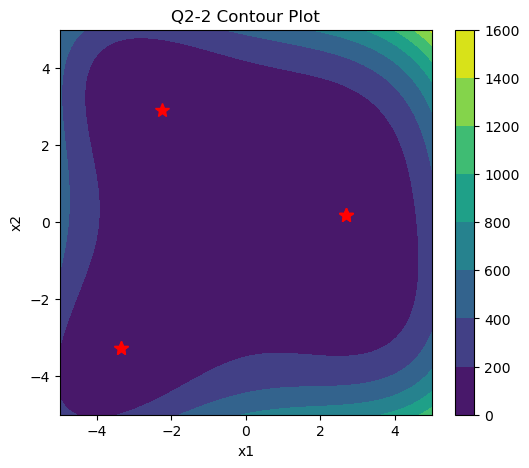

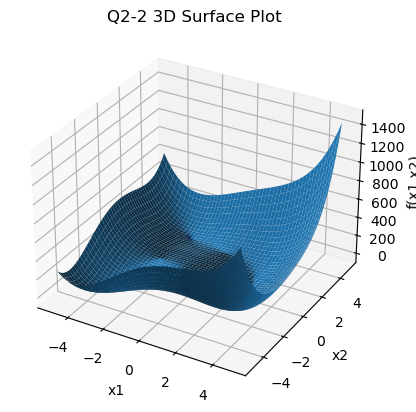

In [13]:
# Q2-2
def Q2_2(x):
    x1, x2 = x
    return (2*x1 + x2**2 - 4)**2 + (x1**2 + x2 - 8)**2

bounds = [(-5, 5), (-5, 5)]

# Try multiple starting points
starting_points = [
    [0, 0],
    [2, 2],
    [-2, -2],
    [4, 4],
    [-4, 3],
    [1, -3]
]

results2 = []
for x0 in starting_points:
    res = minimize(Q2_2, x0, bounds=bounds)
    results2.append(res)
    print(f"{x0}: Optimum {res.x}, f={res.fun:.4f}")

# Plotting for Problem 2
X = np.linspace(-5, 5, 300)
Y = np.linspace(-5, 5, 300)
X1, X2 = np.meshgrid(X, Y)
Z2 = np.array([[Q2_2([x, y]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X1, X2)])

# 2D Contour
plt.figure(figsize=(6, 5))
cp = plt.contourf(X1, X2, Z2)
plt.colorbar(cp)
for res in results2:
    plt.plot(res.x[0], res.x[1], 'r*', markersize=10)
plt.title("Q2-2 Contour Plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# 3D Surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Z2)
ax.set_title("Q2-2 3D Surface Plot")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
for res in results2:
    ax.scatter(res.x[0], res.x[1], res.fun)
plt.show()